In [4]:
from biocrnpyler import MultiMixtureGraph, Mixture, Component, Mechanism, Species, Compartment, Complex, Reaction
import numpy as np

 # Diffusion on a Lattice

Here, a 3x3 lattice is constructed with 9 different mixtures placed into a MultiMixtureGraph and connected to their Moore neighbors (N,S,E,W, and diagonals). They all share a substrate (species s) but no reactions were actively defined between them. However, passive diffusion reacitons were created when the CRN was compiled. Note that the passive diffusion rate is set to 0.2 (arbitrarily). 

In [29]:
s = Species("substrate")

mixtures = []
compartment_names= []

mixtures.append(Mixture("m1"))
mixtures.append(Mixture("m2"))
mixtures.append(Mixture("m3"))
mixtures.append(Mixture("m4"))
mixtures.append(Mixture("m5"))
mixtures.append(Mixture("m6"))
mixtures.append(Mixture("m7"))
mixtures.append(Mixture("m8"))
mixtures.append(Mixture("m9"))

mmg = MultiMixtureGraph("mmg")

for mixture in mixtures:
    mixture.add_species(s)
    m, cn, c = mmg.add_mixture(mixture)
    compartment_names.append(cn)

mmg.connect(compartment_names[0], compartment_names[1], "diff1", "diff1")
mmg.connect(compartment_names[0], compartment_names[4], "diff2", "diff2")
mmg.connect(compartment_names[0], compartment_names[3], "diff3", "diff3")
mmg.connect(compartment_names[1], compartment_names[2], "diff4", "diff4")
mmg.connect(compartment_names[1], compartment_names[3], "diff5", "diff5")
mmg.connect(compartment_names[1], compartment_names[5], "diff6", "diff6")
mmg.connect(compartment_names[2], compartment_names[5], "diff7", "diff7")
mmg.connect(compartment_names[2], compartment_names[4], "diff8", "diff8")
mmg.connect(compartment_names[5], compartment_names[8], "diff9", "diff9")
mmg.connect(compartment_names[5], compartment_names[7], "diff10", "diff10")
mmg.connect(compartment_names[4], compartment_names[8], "diff11", "diff11")
mmg.connect(compartment_names[4], compartment_names[7], "diff12", "diff12")
mmg.connect(compartment_names[4], compartment_names[6], "diff13", "diff13")
mmg.connect(compartment_names[3], compartment_names[7], "diff14", "diff14")
mmg.connect(compartment_names[3], compartment_names[6], "diff15", "diff15")

CRN = mmg.compile_crn(df = 0.2) 

print("CRN STRING REPRESENTATION: \n",CRN, "\n\n")
print("CRN PRETTY-PRINT REPRESENTATION:\n",
      CRN.pretty_print(show_rates = True, show_attributes = True, show_materials = True, show_keys = False))


passive diffusion added
CRN STRING REPRESENTATION: 
 Species = substrate_m1_1, substrate_m2_1, substrate_m3_1, substrate_m4_1, substrate_m5_1, substrate_m6_1, substrate_m7_1, substrate_m8_1, substrate_m9_1
Reactions = [
	substrate <--> substrate
	substrate <--> substrate
	substrate <--> substrate
	substrate <--> substrate
	substrate <--> substrate
	substrate <--> substrate
	substrate <--> substrate
	substrate <--> substrate
	substrate <--> substrate
	substrate <--> substrate
	substrate <--> substrate
	substrate <--> substrate
	substrate <--> substrate
	substrate <--> substrate
	substrate <--> substrate
	substrate <--> substrate
	substrate <--> substrate
	substrate <--> substrate
	substrate <--> substrate
	substrate <--> substrate
	substrate <--> substrate
	substrate <--> substrate
	substrate <--> substrate
	substrate <--> substrate
	substrate <--> substrate
	substrate <--> substrate
	substrate <--> substrate
	substrate <--> substrate
	substrate <--> substrate
	substrate <--> substrate


As a first simulation, we simulate one mixture (top left corner) having a high concentration of the substrate, and none of the others having any. Then we let the diffusion proceed. This is a deterministic simulation for simplicity. As you can see, the initial concentration in the one mixture is 90, and all  9 mixtures eventually have concentratioon 10 by the end. 

In [88]:
timepoints = np.arange(0, 50, .01)
x0_dict = {"substrate_m1_1": 90.}
stochastic = False
results = CRN.simulate_with_bioscrape_via_sbml(timepoints, initial_condition_dict = x0_dict, stochastic = stochastic)

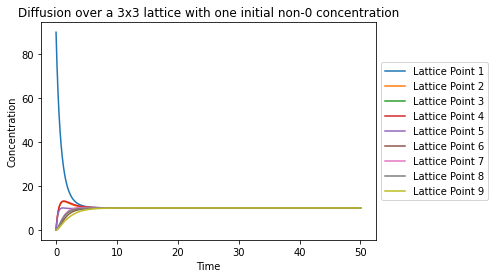

In [89]:
%matplotlib inline
import pylab as plt
if results is not None:
    plt.plot(timepoints, results["substrate_m1_1"],label = "Lattice Point 1")
    plt.plot(timepoints, results["substrate_m2_1"],label = "Lattice Point 2")
    plt.plot(timepoints, results["substrate_m3_1"],label = "Lattice Point 3")
    plt.plot(timepoints, results["substrate_m4_1"],label = "Lattice Point 4")
    plt.plot(timepoints, results["substrate_m5_1"],label = "Lattice Point 5")
    plt.plot(timepoints, results["substrate_m6_1"],label = "Lattice Point 6")
    plt.plot(timepoints, results["substrate_m7_1"],label = "Lattice Point 7")
    plt.plot(timepoints, results["substrate_m8_1"],label = "Lattice Point 8")
    plt.plot(timepoints, results["substrate_m9_1"],label = "Lattice Point 9")
    plt.xlabel("Time")
    plt.ylabel("Concentration")
    plt.title("Diffusion over a 3x3 lattice with one initial non-0 concentration")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

As a second simulation, we start out each mixture at a different concentration, and observe how they all achieve the same concentration when steady state is achieved. 

In [79]:
timepoints = np.arange(0, 50, .01)
x0_dict = {"substrate_m1_1": 40., "substrate_m2_1": 5., "substrate_m3_1": 0., "substrate_m4_1": 100., 
           "substrate_m5_1": 25.,"substrate_m6_1": 2., "substrate_m7_1": 75.,"substrate_m8_1": 60., 
           "substrate_m9_1": 10.}
stochastic = False
results2 = CRN.simulate_with_bioscrape_via_sbml(timepoints, initial_condition_dict = x0_dict, stochastic = stochastic)

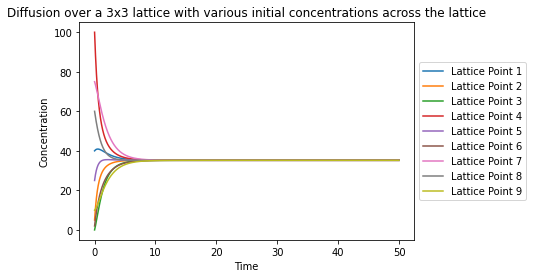

In [80]:
if results2 is not None:
    plt.plot(timepoints, results2["substrate_m1_1"],label = "Lattice Point 1")
    plt.plot(timepoints, results2["substrate_m2_1"],label = "Lattice Point 2")
    plt.plot(timepoints, results2["substrate_m3_1"],label = "Lattice Point 3")
    plt.plot(timepoints, results2["substrate_m4_1"],label = "Lattice Point 4")
    plt.plot(timepoints, results2["substrate_m5_1"],label = "Lattice Point 5")
    plt.plot(timepoints, results2["substrate_m6_1"],label = "Lattice Point 6")
    plt.plot(timepoints, results2["substrate_m7_1"],label = "Lattice Point 7")
    plt.plot(timepoints, results2["substrate_m8_1"],label = "Lattice Point 8")
    plt.plot(timepoints, results2["substrate_m9_1"],label = "Lattice Point 9")
    plt.xlabel("Time")
    plt.ylabel("Concentration")
    plt.title("Diffusion over a 3x3 lattice with various initial concentrations across the lattice")

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Membrane Transport

Here, we simulate a substrate being transported through a membrane via a protein transporter. This MultiMixtureGraph contains three mixtures: one for an internal environment, one for an external environment, and one for a membrane containing the protein transporter.

The protien-transporter mixture utilizes a membrane-transport component and mechanism. 

This examples also includes the way compartments were utilized before MultiMixtureGraph was created (Compartments were assigned to species) to show how this can be integraded into the new functionality of Compartments. 

Additional species T and V act as "controls" that are not transported across the membrane. 


In [41]:
class MembraneTransport(Mechanism):
    def __init__(self, name, transport_protein, type = "transport_with_protein", **keywords):
        if isinstance(transport_protein, Species):
            self.transport_protein = transport_protein
        else:
            raise ValueError("'transport_protein' must be a Species!")
        Mechanism.__init__(self = self, name = name, mechanism_type = type, **keywords)
        
    def update_species(self, int_species, ext_species):
        species = [int_species, ext_species, self.transport_protein]
        species += [Complex([int_species, self.transport_protein])]
        return species
        
    def update_reactions(self, int_species, ext_species, component, part_id = None):
        kb =(component.get_parameter("kb", part_id = part_id, mechanism  = self)).value
        ku = (component.get_parameter("ku", part_id = part_id, mechanism = self)).value
        kt = (component.get_parameter("kt", part_id = part_id, mechanism = self)).value
        
    
        comp = Complex([int_species, self.transport_protein])
        
        binding_rxn = Reaction.from_massaction(inputs=[int_species, self.transport_protein], outputs=[comp], k_forward=kb, k_reverse=ku)
        transport_rxn = Reaction.from_massaction(inputs=[comp], outputs=[self.transport_protein, ext_species], k_forward=kt)
    
        return [binding_rxn, transport_rxn]
    
    
class MembraneTransportProtein(Component):
    
    def __init__(self, name, int_m, ext_m, transport_prot, **keywords):
        self.internal = self.set_species(int_m, material_type = "molecule")
        self.external = self.set_species(ext_m, material_type = "molecule")
        self.transport_protien = self.set_species(transport_prot, material_type = "protien")
        Component.__init__(self = self, name = name, **keywords)
    
    def update_species(self):
        mech_transport = self.get_mechanism("transport_with_protein")
        return mech_transport.update_species(self.internal, self.external)
    
    def update_reactions(self):
        mech_transport = self.get_mechanism("transport_with_protein")
        return mech_transport.update_reactions(self.internal, self.external, component = self, part_id = self.name)

In [43]:
internal = Compartment("internal")
external = Compartment("external")
s_int = Species("substrate", compartment = internal)
s_ext = Species("substrate", compartment = external)
t = Species("t")
v = Species ("v")

M_int = Mixture("internal_mx")
M_int.add_species(s_int)
M_int.add_species(t)
M_ext = Mixture("external_mx")
M_ext.add_species(s_ext)
M_ext.add_species(v)

transport_protein = Species("transport_prot", material_type = "protein")

params = {"kb": 0.3, "ku": 0.7, "kt": 0.5} # arbitrary

mechanism = MembraneTransport("transport_with_protein", transport_protein) 
transport_molecules =  MembraneTransportProtein("membrane1", s_int, s_ext, transport_protein, parameters = params)
M_memb = Mixture("transport_mixture", components = [transport_molecules], parameters = params, mechanisms = mechanism)


mmg = MultiMixtureGraph("membrane_transport_graph")
m1, cn1, c1 = mmg.add_mixture(M_int, compartment = internal)
m2, cn2, c2 = mmg.add_mixture(M_ext, compartment = external)
m3, cn3, c3 = mmg.add_mixture(M_memb, compartment = "membrane")
mmg.connect(cn1, cn3, "external_membrane", "internal")
mmg.connect(cn2, cn3, "internal_membrane", "exernal")


CRN2 = mmg.compile_crn(add_passive_diffusion = False)

print("CRN STRING REPRESENTATION: \n", CRN2, "\n\n")
print("CRN PRETTY-PRINT REPRESENTATION:\n",
      CRN2.pretty_print(show_rates = True, show_attributes = True, show_materials = True, show_keys = False))


CRN STRING REPRESENTATION: 
 Species = substrate_internal, t_internal, substrate_external, v_external, protein_transport_prot_membrane_1, complex_protein_transport_prot_membrane_1_substrate_internal_membrane_1_, complex_protein_transport_prot_membrane_1_substrate_internal_
Reactions = [
	substrate+protein[transport_prot] <--> complex[protein[transport_prot]:substrate]
	complex[protein[transport_prot]:substrate] --> protein[transport_prot]+substrate
] 


CRN PRETTY-PRINT REPRESENTATION:
 Species(N = 7) = {
v (@ 0),  protein[transport_prot] (@ 0),  t (@ 0),  substrate (@ 0),  substrate (@ 0),  complex[protein[transport_prot]:substrate] (@ 0),  complex[protein[transport_prot]:substrate] (@ 0),  
}

Reactions (2) = [
0. substrate+protein[transport_prot] <--> complex[protein[transport_prot]:substrate]
 Kf=k_forward * substrate_internal * protein_transport_prot_membrane_1
 Kr=k_reverse * complex_protein_transport_prot_membrane_1_substrate_internal_
  k_forward=0.3
  k_reverse=0.7

1. complex

Now, we simulate deterministically. As you can see, the amount of internal substrate decreases as it is transported across the membrane and transformed to external substrate. Levels of T and V stay constant, and the amount of bound + unbound probe stays constant. This is all what we expect. 

In [87]:
timepoints = np.arange(0, 500, .01)
x0_dict = {"substrate_internal": 50., "protein_transport_prot_membrane_1": 1., "t_internal": 15., "v_external": 10., "substrate_external": 0.}
stochastic = False
results3 = CRN2.simulate_with_bioscrape_via_sbml(timepoints, initial_condition_dict = x0_dict, stochastic = stochastic)

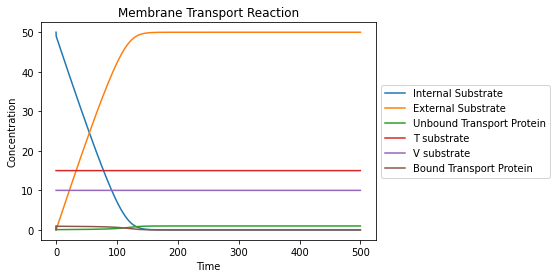

In [86]:
if results3 is not None:
    plt.plot(timepoints, results3["substrate_internal"],label = "Internal Substrate")
    plt.plot(timepoints, results3["substrate_external"],label = "External Substrate")
    plt.plot(timepoints, results3["protein_transport_prot_membrane_1"],label = "Unbound Transport Protein")
    plt.plot(timepoints, results3["t_internal"],label = "T substrate")
    plt.plot(timepoints, results3["v_external"],label = "V substrate")
    plt.plot(timepoints, results3["complex_protein_transport_prot_membrane_1_substrate_internal_"],label = "Bound Transport Protein")
    
    plt.xlabel("Time")
    plt.ylabel("Concentration")
    plt.title("Membrane Transport Reaction")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
